# **Capítulo 4 - Jennifer Paola Loaiza Rada Grupo 1**

<p> Ejericicos <p>

<p> 1. Utilizar modelos de clasificación de datos para hallar diferentes segmentos de clientes y representarlo gráficamente<p>

<p> 2. Explorar el uso de modelo mpas utilizados en la industria de seguros <p>

<p> 3. Analizar pasos requeridos para la industrialización de modelos <p>


In [75]:
# Importación de la librería
from sklearn.linear_model import LogisticRegression # Modelo de regresión lógistica
from sklearn.metrics import classification_report, confusion_matrix # Clasificación de los modelos
from sklearn.metrics import roc_auc_score # Medición del acierto
from sklearn.model_selection import train_test_split, KFold, cross_val_score # Validación cruzada y división de los datos de train y test
from sklearn.neighbors import KNeighborsClassifier # Modelo K-vecinos cercanos
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Escalamiento de las variables
from sklearn.tree import DecisionTreeClassifier # Modelo de árbol de decisión 
from sklearn.cluster import KMeans # K-mean modelo de segmentación
from tabulate import tabulate # Formato de las tablas
import numpy as np # Manejo de matrices
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors # Paleta de colores
import matplotlib.pyplot as plt # Elaboración de gráficos
import pandas as pd # Manejo de DataFrame
import seaborn as sns # Elaboración de gráficos

## **1. Modelo de clasificación**

<p>Para construir nuestro modelo de clasificación, primero realizamos un análisis de correlación entre las variables para asegurarnos de que fueran independientes entre sí. Este paso fue crucial para seleccionar las variables más relevantes como predictores. Las variables seleccionadas como explicativas incluyen indicadores de recencia y frecuencia, edad, promedio de gasto, género y cantidad de artículos. Por otro lado, la variable dependiente es el segmento de clientes, donde el valor 1 representa a los aficionados y adictos, mientras que el valor 0 corresponde a los demás segmentos. <p>

<p> Una vez que identificamos las variables a utilizar, dividimos nuestros datos en conjuntos de entrenamiento y prueba. Sin embargo, notamos que la proporción de la variable 'y' era desigual en estos conjuntos, por lo que realizamos un submuestreo para igualar la cantidad de '1' y '0' en los datos de entrenamiento. Además, escalamos las variables 'X' en ambos conjuntos para garantizar un tratamiento uniforme. <p>

<p> Después de completar el preprocesamiento de datos, procedimos a ejecutar tres modelos de clasificación: regresión logística, árbol de decisión y K-vecinos. Los tres modelos demostraron una capacidad de clasificación efectiva, con una tasa de acierto superior al 85% para ambas categorías. Destacó especialmente el árbol de decisión, que logró una impresionante precisión del 93%. Además, realizamos una validación cruzada con estos tres modelos, sin considerar el tratamiento de datos mencionado anteriormente, y los resultados se mantuvieron consistentes. Esto respalda la conclusión de que las variables independientes seleccionadas son capaces de clasificar correctamente el tipo de cliente. <p>


In [2]:
# Cargar la base de datos
data = pd.read_excel('./data_clean.xlsx')

C:\Users\Jennifer\AppData\Local\Temp\ipykernel_14920\3863496235.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


Text(0.5, 1.0, 'Matriz de Correlación')

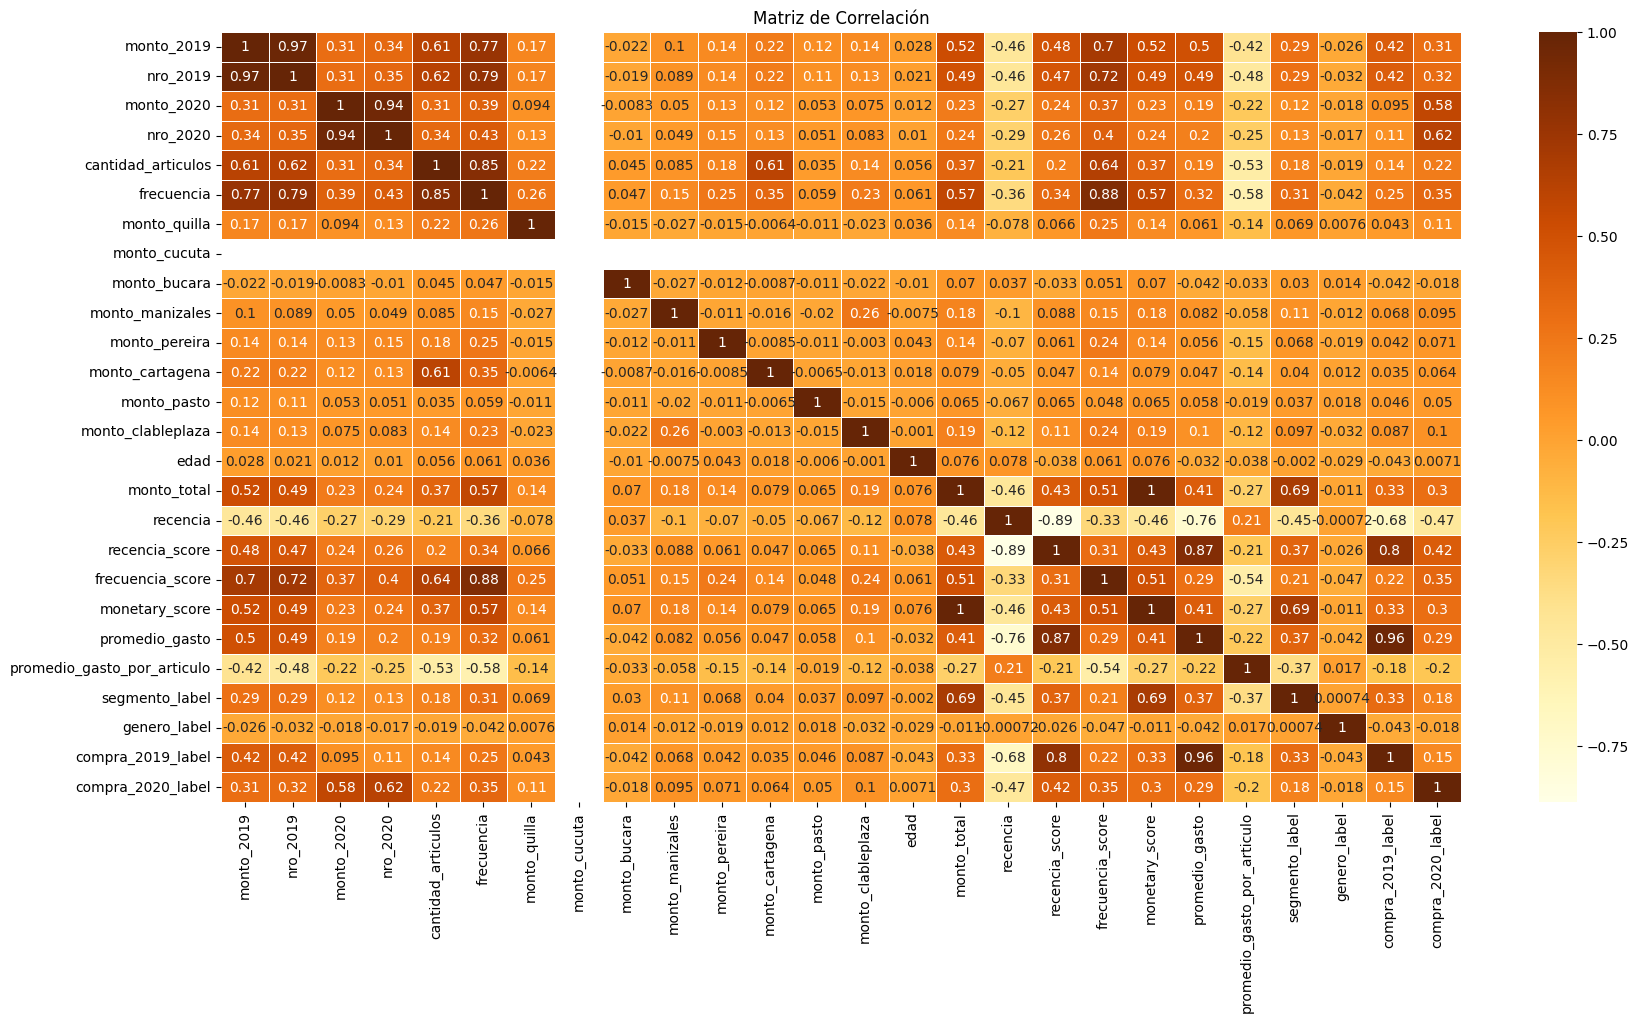

In [3]:
#Matriz de correlación
plt.figure(figsize=(20, 10))
correlacion = data.corr()
sns.heatmap(correlacion, annot=True, cmap='YlOrBr', linewidths=.5)
plt.title('Matriz de Correlación')

### **1.1. Datos de entrenamiento**

In [60]:
# Creación de los datos de entrenemiento y de prueba
X = data[['recencia_score', 'edad', 'frecuencia_score', 'promedio_gasto','genero_label', 'cantidad_articulos']]

y = data['segmento_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=10) 

### **1.2. Balanceamiento de datos**

In [61]:
# Desnivel entre el segmento 0 y 1
y_train.value_counts()

1    5285
0    2197
Name: segmento_label, dtype: int64

In [62]:
x_y_train = pd.merge(X_train, y_train, left_index=True, right_index=True, how='inner' )
segmento_1 = x_y_train[x_y_train['segmento_label'] == 1]
segmento_0 = x_y_train[x_y_train['segmento_label'] == 0] 
segmento_1 = segmento_1.sample(segmento_0.shape[0], random_state=10)
segmento_balanceado = pd.concat([segmento_1, segmento_0])
print('Los valores entre segmentos 0 y 1 están balanceados', segmento_balanceado['segmento_label'].value_counts())
# Separamos y y x de entrenamiento
X_train_balanceado = segmento_balanceado.drop(['segmento_label'], axis=1)
y_train_balanceado = segmento_balanceado['segmento_label']


Los valores entre segmentos 0 y 1 están balanceados 1    2197
0    2197
Name: segmento_label, dtype: int64


### **1.3. Escalamiento de los datos**

In [63]:
#Escalamiento de las variables independientes
scaler = StandardScaler()
 
scaled_X_train = scaler.fit_transform(X_train_balanceado)
scaled_X_test = scaler.transform(X_test)

### **1.4. Regresión logistica**

In [64]:
logreg = LogisticRegression(random_state = 10)
logreg.fit(scaled_X_train, y_train_balanceado)
predic_logit = logreg.predict(scaled_X_test)
class_log = classification_report(y_test, predic_logit)
print("Regresión logística: \n", class_log)

Regresión logística: 
               precision    recall  f1-score   support

           0       0.67      0.97      0.79       753
           1       0.98      0.80      0.88      1741

    accuracy                           0.85      2494
   macro avg       0.83      0.88      0.84      2494
weighted avg       0.89      0.85      0.85      2494



### **1.5. Árbol de decisión**

In [65]:
tree = DecisionTreeClassifier(random_state=10)

# ajuste
tree.fit(scaled_X_train, y_train_balanceado)

# Predecir las etiquetas para los datos de prueba.
pred_tree = tree.predict(scaled_X_test)
class_tree = classification_report(y_test, pred_tree)
print("Árbol de decisión: \n", class_tree)

Árbol de decisión: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       753
           1       0.97      0.93      0.95      1741

    accuracy                           0.93      2494
   macro avg       0.92      0.94      0.92      2494
weighted avg       0.94      0.93      0.94      2494



### **1.6. K-vecinos**

In [66]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(scaled_X_train, y_train_balanceado)
pred_kn = kn.predict(scaled_X_test)
class_kn = classification_report(y_test, pred_kn)
print("K-Vecinos cercanos: \n", class_kn)

K-Vecinos cercanos: 
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       753
           1       0.95      0.85      0.90      1741

    accuracy                           0.87      2494
   macro avg       0.84      0.88      0.85      2494
weighted avg       0.88      0.87      0.87      2494



### **1.7. Validación cruzada**

In [67]:
# Número de pliegues 
kf = KFold(10)

# Validación cruzada
logit_score = cross_val_score(logreg, X, y, cv = kf )
tree_score = cross_val_score(tree, X, y, cv = kf )
kn_score = cross_val_score(kn, X, y, cv=kf)

print("Logistic Regression:", np.mean(logit_score), "Decision Tree:", np.mean(tree_score), 'K-Neighbors:', np.mean(kn_score))

Logistic Regression: 0.938350924517038 Decision Tree: 0.9542930394389583 K-Neighbors: 0.9626126877626868


### **1.8. AUC-ROC Score**

In [68]:
auc_roc = roc_auc_score(y_test, predic_logit)
print("Logistic Regression AUC-ROC Score:", auc_roc)

auc_roc = roc_auc_score(y_test, pred_tree)
print("Decision Tree AUC-ROC Score:", auc_roc)

auc_roc = roc_auc_score(y_test, pred_kn)
print("K-Neighbors AUC-ROC Score:", auc_roc)

Logistic Regression AUC-ROC Score: 0.8823084075720857
Decision Tree AUC-ROC Score: 0.9362309521248722
K-Neighbors AUC-ROC Score: 0.875439845061645


### **1.9. Matriz de confusión**

Text(0.5, 1.0, 'Matriz de confusión: K-vecinos más cercanos')

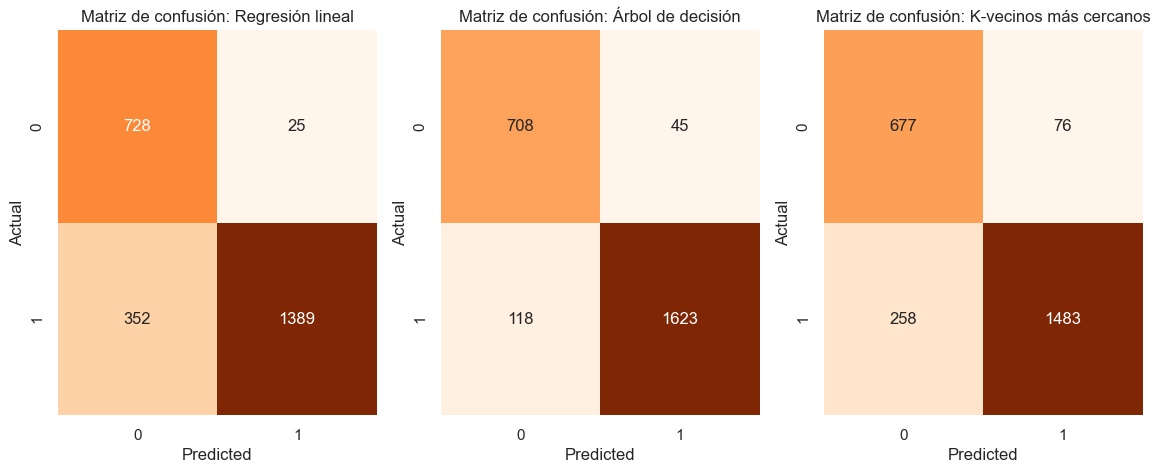

In [69]:

sns.set()
# Calcula la matriz de confusión
conf_matrix_regret = confusion_matrix(y_test, predic_logit)
conf_matrix_tree = confusion_matrix(y_test, pred_tree)
conf_matrix_kn = confusion_matrix(y_test, pred_kn)

# Matriz de confusión de regresión lineal
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_regret, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión: Regresión lineal')

# Matriz de confusión de árbol decisión
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión: Árbol de decisión')

# Matriz de confusión de K-vecinos más cercanos
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_kn, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión: K-vecinos más cercanos')



## **2. Modelo de segmentación**

In [80]:
X = data[['recencia', 'edad', 'frecuencia', 'promedio_gasto','genero_label', 'cantidad_articulos']]

kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


c:\Users\Jennifer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Recencia vs Cantidad de artículos comprados')

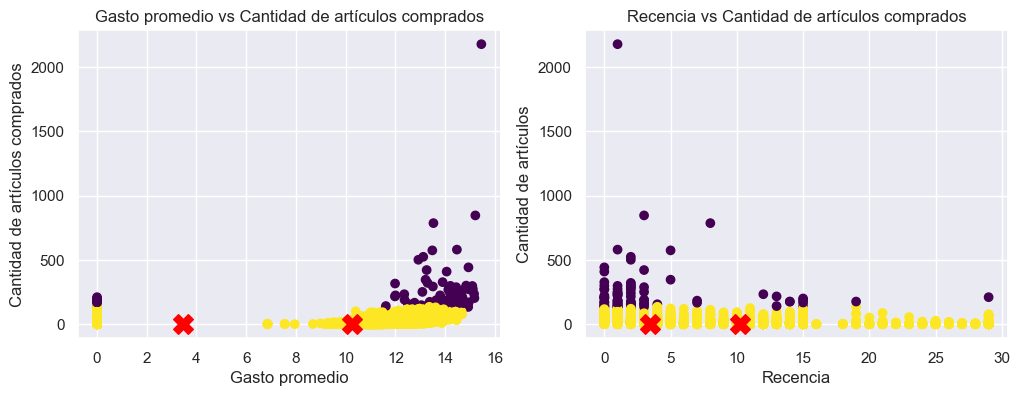

In [101]:
# #Resultados de K-means
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(X['promedio_gasto'].values , X['cantidad_articulos'].values , c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel('Gasto promedio')
plt.ylabel('Cantidad de artículos comprados')
plt.title('Gasto promedio vs Cantidad de artículos comprados')

plt.subplot(1,2,2)
plt.scatter(X['recencia'].values , X['cantidad_articulos'].values , c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.xlabel('Recencia')
plt.ylabel('Cantidad de artículos')
plt.title('Recencia vs Cantidad de artículos comprados')

## **3. Modelos más utilizados en la industria de seguros**

<p> Uno de los enfoques más destacados en el campo del aprendizaje automático abarca diversas aplicaciones en el sector. Algunos de estos destacados incluyen 1) Modelos de Puntuación de Riesgo: Estos modelos emplean regresiones logísticas para evaluar y cuantificar el nivel de riesgo asociado con individuos o entidades, lo que resulta fundamental en la determinación de tarifas de seguros. 2) Clasificación de Fraude: La detección de fraudes se apoya en una variedad de modelos de clasificación, incluyendo árboles de decisión, Random Forest y redes neuronales, permitiendo identificar posibles casos de fraude en reclamaciones de seguros. 3) Segmentación de Clientes: A través de algoritmos de agrupación, como K-Means, se logra la segmentación efectiva de clientes en grupos afines, permitiendo la adaptación de productos y servicios a las necesidades de cada segmento. 4) Predicción de Abandono de Clientes (Churn): Utilizando la metodología de predicción de abandono de clientes (Churn), se anticipa la posibilidad de que los clientes cancelen sus pólizas, lo que facilita la toma de acciones preventivas. 5) Estos son solo algunos ejemplos de las diversas aplicaciones de aprendizaje automático en el sector de seguros. Estos modelos proporcionan una base sólida para la toma de decisiones, la personalización de servicios y la mitigación de riesgos.<p>

## **4. Pasos requeridos para la industrialización de modelo**

<p> El proceso de llevar un modelo desde su concepción hasta su producción se inicia con una comprensión clara de los objetivos empresariales y la disponibilidad de datos para análisis o las herramientas necesarias para recopilarlos. A continuación, se describen las etapas clave de este proceso. 1) Definición de Objetivos Empresariales y Recopilación de Datos: Todo comienza con una comprensión sólida de los objetivos comerciales que se desean alcanzar. Se evalúa si existen datos disponibles para el análisis o si es necesario implementar estrategias de recolección de datos. La claridad en los objetivos es esencial para guiar el proceso. 2) Limpieza y Análisis Exploratorio de Datos: Los datos recopilados se someten a un proceso de limpieza para eliminar valores atípicos, datos faltantes y ruido. Luego, se realiza un análisis exploratorio para obtener insights iniciales y comprender la naturaleza de los datos. 3) Entrenamiento y Evaluación del Modelo: Con los datos preparados, se procede a entrenar el modelo de machine learning. Durante esta etapa, el modelo se ajusta y se evalúa en función de los objetivos empresariales establecidos. Se ajustan los hiperparámetros y se refinan las técnicas para lograr el mejor rendimiento posible. 4) Monitoreo Continuo de la Precisión y Calidad del Modelo: Una vez que el modelo está en producción, es esencial mantener un monitoreo constante para evaluar su precisión y calidad en un entorno de tiempo real. Se utilizan sistemas de monitoreo para detectar desviaciones y problemas de rendimiento. 5) Iteración y Mejora Continua: La última fase considera la necesidad de repetir los pasos anteriores para mejorar el modelo. Esto implica ajustes, refinamientos y la posibilidad de crear múltiples versiones del modelo para abordar diferentes aspectos del problema empresarial o adaptarse a cambios en los datos o en el entorno. <p>